<h1><center>CREDIT CARD FRAUD DETECTION</center><h1>

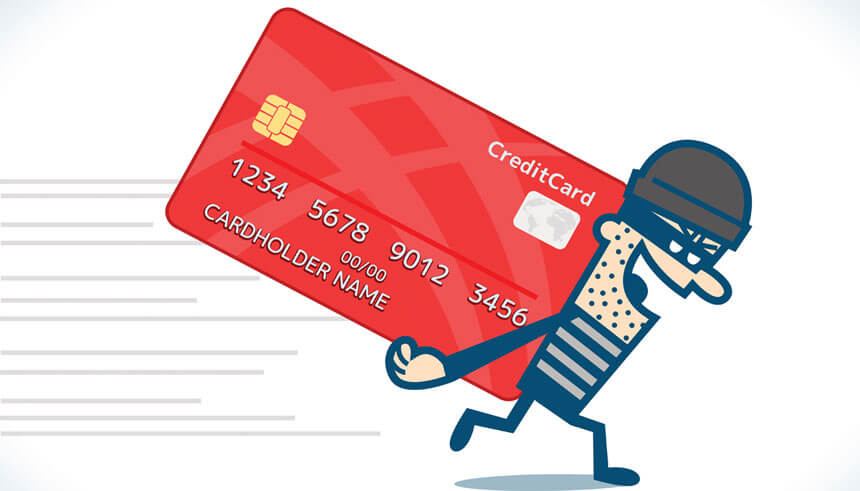

In [67]:
from IPython.display import Image
Image(filename='Image1.jpg') 

## Importing the Dependencies

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
credit_card_data= pd.read_csv('./creditcard.csv ')

In [3]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
credit_card_data.head(5) #printing first five rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#these data are converted to decimals using PCA and the amount is in dollars.

In [6]:
credit_card_data.tail(5) #printing last five rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Getting Information about dataset

In [7]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

## Checking the missing values

In [8]:
credit_card_data.isnull().sum() #we're lucky that there isn't any null value.

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Distribution of Legit and Fraudulent Transaction

In [11]:
credit_card_data['Class'].value_counts() # 0 represents legit, 1 fraudulent

0    284315
1       492
Name: Class, dtype: int64

## Seperating Legit and Fraudulent Transaction

In [14]:
legit= credit_card_data[credit_card_data['Class']==0]
fraud= credit_card_data[credit_card_data['Class']==1]

In [16]:
legit.shape     #checking shape of legit transactions

(284315, 31)

In [17]:
fraud.shape   #checking shape of legit transactions

(492, 31)

## Getting statistical details of Amount

In [18]:
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
#fraud has more mean transaction amount than legit. Interesting!

## Comparing Legit and Fraudulent Transactions

In [23]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Creating a sample database of Legit transactions to balance with Fraudulent Transactions through Random Sampling

In [26]:
legit_sample= legit.sample(n=492) #creating sample dataframes with values equal to fraud one.

In [27]:
legit_sample.shape #equal to fraudulent

(492, 31)

## Concatenating two Dataframes(legit_sample and fraud)

In [30]:
new_dataset= pd.concat([legit_sample,fraud],axis=0) #concatenating both dataframes row wise.

In [31]:
new_dataset.head() #printing first five rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
199614,133053.0,2.288097,-0.545296,-1.731737,-1.103637,0.222568,-0.460150,-0.187675,-0.340348,-0.674301,...,-0.007177,0.086710,0.136620,0.075402,0.140296,-0.270625,-0.031180,-0.061954,4.13,0
276667,167235.0,-1.558763,1.791164,-0.796071,-0.655619,-0.328965,-1.288576,0.380144,0.686527,0.283014,...,-0.185096,-0.372240,0.204744,0.028027,-0.650441,0.173238,0.477306,0.303058,12.31,0
212482,138877.0,1.982291,0.771128,-1.627248,3.678318,1.208657,-0.263169,0.823446,-0.308987,-1.407231,...,0.109977,0.358481,-0.004763,0.672202,0.459986,0.141808,-0.083920,-0.059834,14.94,0
266252,162252.0,-0.264920,-1.228187,-0.318918,-0.981932,1.510889,-2.028430,-0.050322,-0.780420,-0.407406,...,0.082234,0.903842,0.072617,0.044867,-2.072615,-0.538580,0.340292,-0.088238,15.00,0
254260,156646.0,1.548162,-1.622325,-3.268960,-0.354169,0.369274,-0.847419,1.060079,-0.674066,-1.177825,...,0.083525,-0.048130,-0.500001,0.127644,0.478752,0.986999,-0.202542,-0.022854,408.00,0


In [32]:
new_dataset.tail() #prining last five rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [34]:
new_dataset['Class'].value_counts() #uniform data

1    492
0    492
Name: Class, dtype: int64

In [36]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95976.863821,0.026742,0.006250,-0.126643,0.020934,-0.043099,-0.097548,0.061939,-0.040362,0.094364,...,-0.062532,-0.025245,-0.032134,-0.024033,0.051974,-0.003168,0.027476,0.000935,-0.028822,96.515793
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Splitting data into features and targets

In [38]:
X= new_dataset.drop(columns= 'Class', axis=1) #creating our X variable for features
Y= new_dataset['Class'] #creating Y variable for target

In [41]:
X.shape #we only have 30 columns now

(984, 30)

In [42]:
Y #target variable

199614    0
276667    0
212482    0
266252    0
254260    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

## Splitting data into training and testing data

In [45]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.2, stratify= Y, random_state=2) # 80% goes to training and 20% testing

In [46]:
print(X_train.shape, X_test.shape) #division of data

(787, 30) (197, 30)


## Model Training

## --> Logistic Regression

In [47]:
model= LogisticRegression() #creating an instance of Logistic Regression in variable model.

In [51]:
model.fit(X_train, Y_train) #fitting our training data into the model

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Evaluation

In [61]:
#checking accuracy score on training data

In [56]:
Y_prediction= model.predict(X_train)

In [57]:
training_data_accuracy= accuracy_score(Y_prediction, Y_train) #performing R^2 test.

In [58]:
print("Accuracy on Training Data: ", training_data_accuracy)

Accuracy on Training Data:  0.9440914866581956


In [59]:
# 94% is pretty good number:)!

In [60]:
#checking accuracy score on testing data

In [63]:
Y_prediction_test= model.predict(X_test)

In [64]:
testing_data_accuracy= accuracy_score(Y_prediction_test, Y_test) #performing R^2 test.

In [65]:
print("Accuracy on Testing Data: ", testing_data_accuracy)

Accuracy on Testing Data:  0.9289340101522843


In [66]:
# 92.8% is also pretty good number:)!

In [ ]:
# Model is perfectly fitted as both values are similar. 